In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from imports.loss import *
from imports.algorithm import *
from imports.scenarios import *
from imports.plot import *

from IPython.display import HTML

In [2]:
NUM_AGENTS = 5
VARS_DIM = 2
SEED = 42

rng = np.random.default_rng(SEED)

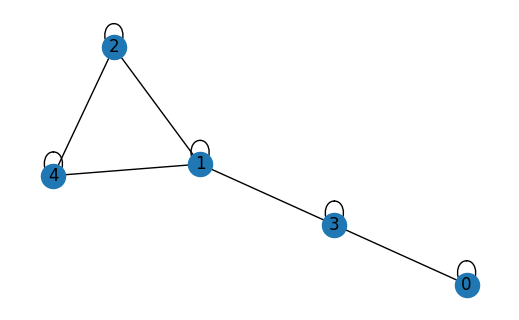

In [3]:
%matplotlib inline
G, A = create_network_of_agents(
    NUM_AGENTS,
    graph_form = "binomial_graph",
    seed = int(rng.integers(0, 2**32)),
    dtype = np.float64
)

targets_pos = rng.random(size=(NUM_AGENTS, VARS_DIM))
z0 = rng.random(size=(NUM_AGENTS, VARS_DIM))

agents = [Agent(targets_pos[i]) for i in range(NUM_AGENTS)]

plt.figure(figsize=(5, 3))
nx.draw_kamada_kawai(G, with_labels=True)
plt.show()

In [4]:
history_z, history_sigma = aggregative_optimization(
    agents = agents, 
    z0 = z0, 
    A = A, 
    alpha = 1e-2, 
    num_iters = 5000
)

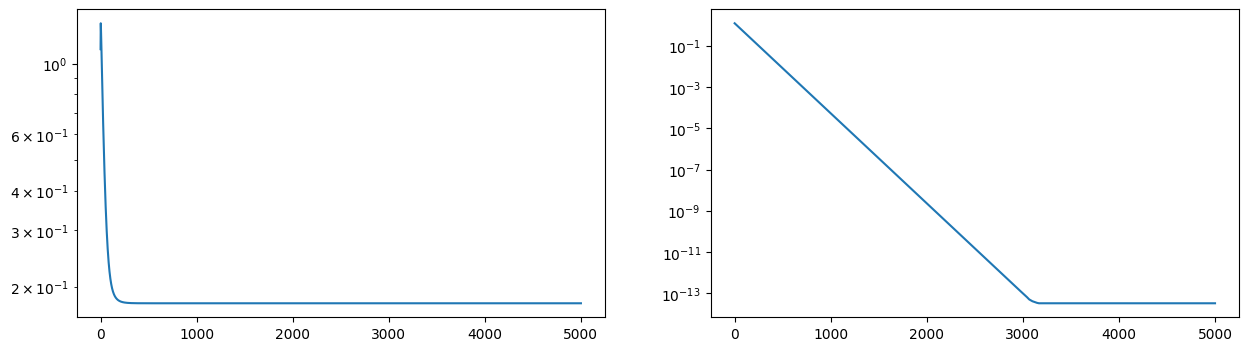

In [5]:
%matplotlib inline

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot([ sum(agents[i].loss(z[i], s[i]) for i in range(NUM_AGENTS)) for z, s in zip(history_z, history_sigma)], label="Distributed")
plt.yscale("log")

plt.subplot(1, 2, 2)
plt.plot([ np.linalg.norm(sum(agents[i].loss.tot_grad(z[i], s[i]) for i in range(NUM_AGENTS))) for z, s in zip(history_z, history_sigma)], label="Distributed")
plt.yscale("log")

plt.show()

In [6]:
# %matplotlib inline
# plot_scenario(agents, history_z[-1], targets_pos)

In [7]:
%matplotlib notebook
anim = plot_animation(        
    agents,
    history_estimates = history_z, 
    targets_pos = targets_pos, 
    ff_threshold = None,
    sample_size = 50
)
HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>